In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
import keras


input_shape = (100, 100)
batch_size = 32
epochs = 100


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,

    validation_split=0.3,
)

train_data = datagen.flow_from_directory(
    './images',
    target_size=input_shape,
    batch_size=batch_size,
    interpolation="lanczos",
    shuffle=True,
    subset='training',
)

validation_data = datagen.flow_from_directory(
    './images',
    target_size=input_shape,
    batch_size=batch_size,
    interpolation="lanczos",
    shuffle=True,
    subset='validation',
)

Found 992 images belonging to 15 classes.
Found 416 images belonging to 15 classes.


In [3]:
train_data.class_indices

{'1': 0,
 '10': 1,
 '11': 2,
 '12': 3,
 '13': 4,
 '14': 5,
 '15': 6,
 '2': 7,
 '3': 8,
 '4': 9,
 '5': 10,
 '6': 11,
 '7': 12,
 '8': 13,
 '9': 14}

In [12]:
def print_history(hist):
    for k in hist.history.keys():
        if k.startswith('val_'):
            continue

        try:
            # summarize history for accuracy
            plt.plot(hist.history[k])
            plt.plot(hist.history['val_' + k])
            plt.title('model ' + k)
            plt.ylabel(k)
            plt.xlabel('epoch')
            plt.legend(['train', 'test'], loc='upper left')
            plt.show()
        except KeyError:
            pass

        
class StopTrainingIfEnoughAcc(keras.callbacks.Callback):
    # https://medium.com/analytics-vidhya/transfer-learning-using-inception-v3-for-image-classification-86700411251b
    def on_epoch_end(self, epoch, logs={}):
        # Available in logs: 'loss', 'accuracy', 'val_<same>'
        if logs['accuracy'] > 0.99:
            print(f"\nGot to accuracy '{logs.get('accuracy')*100:.2f}%'")
            self.model.stop_training = True

def do_fit(model, train, test, tgt, epochs=20_000):
    callbacks = [
        ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=3, rate=0.6, min_lr=1e-18, verbose=1),
        EarlyStopping(monitor='val_loss', patience=10, verbose=1),
        ModelCheckpoint(f'./{tgt}/epoch_{{epoch:03d}}-{{val_accuracy:.5f}}.hdf5', monitor='accuracy', initial_value_threshold=0.85, verbose=1, save_best_only=True, mode='max'),
        StopTrainingIfEnoughAcc(),
    ]


    hist = model.fit(
        train,
        validation_data=test,
        epochs=epochs,  # We do early stopping. So this will always stop before this point
        shuffle=True,
        callbacks=callbacks,
        verbose=1
    )

    print_history(hist)

    globals()[f'{tgt}_hist'] = hist

Epoch 1/20000
31/31 [==============================] - ETA: 0s - loss: 3.3732 - accuracy: 0.2046
Epoch 1: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 90ms/step - loss: 3.3732 - accuracy: 0.2046 - val_loss: 2.1053 - val_accuracy: 0.3341 - lr: 0.0010
Epoch 2/20000
31/31 [==============================] - ETA: 0s - loss: 2.2366 - accuracy: 0.2389
Epoch 2: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 85ms/step - loss: 2.2366 - accuracy: 0.2389 - val_loss: 1.9712 - val_accuracy: 0.4399 - lr: 0.0010
Epoch 3/20000
30/31 [============================>.] - ETA: 0s - loss: 2.1365 - accuracy: 0.2979
Epoch 3: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 87ms/step - loss: 2.1377 - accuracy: 0.2974 - val_loss: 1.9638 - val_accuracy: 0.3726 - lr: 0.0010
Epoch 4/20000
31/31 [==============================] - ETA: 0s - loss: 1.9865 - accuracy: 0.3710
Epoch 4: accuracy did not improve from 0.8

31/31 [==============================] - 3s 90ms/step - loss: 1.0446 - accuracy: 0.6593 - val_loss: 0.7113 - val_accuracy: 0.7620 - lr: 0.0010
Epoch 30/20000
30/31 [============================>.] - ETA: 0s - loss: 0.9607 - accuracy: 0.6802
Epoch 30: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 86ms/step - loss: 0.9641 - accuracy: 0.6774 - val_loss: 0.6951 - val_accuracy: 0.7620 - lr: 0.0010
Epoch 31/20000
31/31 [==============================] - ETA: 0s - loss: 1.0323 - accuracy: 0.6462
Epoch 31: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 88ms/step - loss: 1.0323 - accuracy: 0.6462 - val_loss: 0.7137 - val_accuracy: 0.7716 - lr: 0.0010
Epoch 32/20000
31/31 [==============================] - ETA: 0s - loss: 0.9604 - accuracy: 0.6825
Epoch 32: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 92ms/step - loss: 0.9604 - accuracy: 0.6825 - val_loss: 0.6966 - val_accuracy: 0.7620 - l

Epoch 58/20000
31/31 [==============================] - ETA: 0s - loss: 0.8150 - accuracy: 0.7067
Epoch 58: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 84ms/step - loss: 0.8150 - accuracy: 0.7067 - val_loss: 0.5502 - val_accuracy: 0.7981 - lr: 0.0010
Epoch 59/20000
31/31 [==============================] - ETA: 0s - loss: 0.8001 - accuracy: 0.7167
Epoch 59: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 85ms/step - loss: 0.8001 - accuracy: 0.7167 - val_loss: 0.5428 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 60/20000
31/31 [==============================] - ETA: 0s - loss: 0.8376 - accuracy: 0.6966
Epoch 60: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 85ms/step - loss: 0.8376 - accuracy: 0.6966 - val_loss: 0.4974 - val_accuracy: 0.8101 - lr: 0.0010
Epoch 61/20000
31/31 [==============================] - ETA: 0s - loss: 0.8046 - accuracy: 0.7248
Epoch 61: accuracy did not improve 

31/31 [==============================] - ETA: 0s - loss: 0.6244 - accuracy: 0.7712
Epoch 86: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 86ms/step - loss: 0.6244 - accuracy: 0.7712 - val_loss: 0.3819 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 87/20000
31/31 [==============================] - ETA: 0s - loss: 0.6700 - accuracy: 0.7641
Epoch 87: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 84ms/step - loss: 0.6700 - accuracy: 0.7641 - val_loss: 0.3859 - val_accuracy: 0.8486 - lr: 1.0000e-04
Epoch 88/20000
31/31 [==============================] - ETA: 0s - loss: 0.6894 - accuracy: 0.7591
Epoch 88: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 91ms/step - loss: 0.6894 - accuracy: 0.7591 - val_loss: 0.3891 - val_accuracy: 0.8534 - lr: 1.0000e-04
Epoch 89/20000
30/31 [============================>.] - ETA: 0s - loss: 0.6540 - accuracy: 0.7615
Epoch 89: accuracy did not improve fro

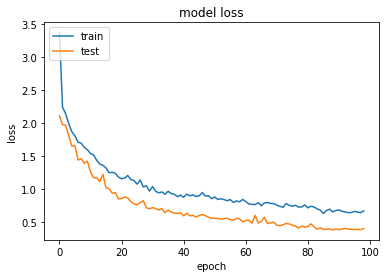

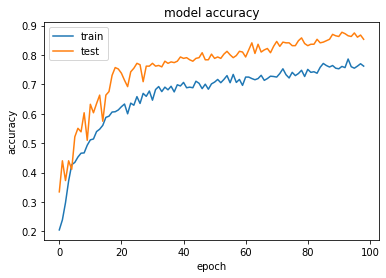

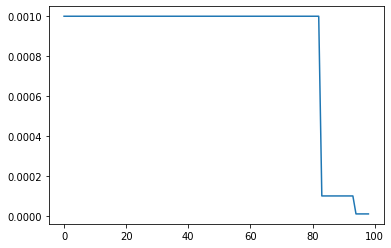

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape + (3,)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_data.num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


do_fit(model, train_data, validation_data, 'model1')

Epoch 1/20000
31/31 [==============================] - ETA: 0s - loss: 3.2372 - accuracy: 0.2107
Epoch 1: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 88ms/step - loss: 3.2372 - accuracy: 0.2107 - val_loss: 2.3839 - val_accuracy: 0.2644 - lr: 0.0010
Epoch 2/20000
31/31 [==============================] - ETA: 0s - loss: 2.1885 - accuracy: 0.2067
Epoch 2: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 84ms/step - loss: 2.1885 - accuracy: 0.2067 - val_loss: 2.3881 - val_accuracy: 0.2644 - lr: 0.0010
Epoch 3/20000
31/31 [==============================] - ETA: 0s - loss: 2.1375 - accuracy: 0.2258
Epoch 3: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 84ms/step - loss: 2.1375 - accuracy: 0.2258 - val_loss: 2.4225 - val_accuracy: 0.2284 - lr: 0.0010
Epoch 4/20000
31/31 [==============================] - ETA: 0s - loss: 2.1173 - accuracy: 0.2661
Epoch 4: accuracy did not improve from 0.8

31/31 [==============================] - 3s 84ms/step - loss: 0.6337 - accuracy: 0.7843 - val_loss: 0.6091 - val_accuracy: 0.8293 - lr: 0.0010
Epoch 30/20000
31/31 [==============================] - ETA: 0s - loss: 0.5801 - accuracy: 0.7994
Epoch 30: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 84ms/step - loss: 0.5801 - accuracy: 0.7994 - val_loss: 0.4765 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 31/20000
31/31 [==============================] - ETA: 0s - loss: 0.5716 - accuracy: 0.8004
Epoch 31: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 84ms/step - loss: 0.5716 - accuracy: 0.8004 - val_loss: 0.5509 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 32/20000
31/31 [==============================] - ETA: 0s - loss: 0.5282 - accuracy: 0.8145
Epoch 32: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 84ms/step - loss: 0.5282 - accuracy: 0.8145 - val_loss: 0.4299 - val_accuracy: 0.8774 - l

Epoch 56/20000
31/31 [==============================] - ETA: 0s - loss: 0.1747 - accuracy: 0.9365
Epoch 56: accuracy improved from 0.92339 to 0.93649, saving model to ./model2\epoch_056-0.95913.hdf5
31/31 [==============================] - 8s 258ms/step - loss: 0.1747 - accuracy: 0.9365 - val_loss: 0.0934 - val_accuracy: 0.9591 - lr: 0.0010
Epoch 57/20000
30/31 [============================>.] - ETA: 0s - loss: 0.1879 - accuracy: 0.9344
Epoch 57: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 57: accuracy did not improve from 0.93649
31/31 [==============================] - 3s 88ms/step - loss: 0.2022 - accuracy: 0.9315 - val_loss: 0.2020 - val_accuracy: 0.9399 - lr: 0.0010
Epoch 58/20000
31/31 [==============================] - ETA: 0s - loss: 0.2054 - accuracy: 0.9325
Epoch 58: accuracy did not improve from 0.93649
31/31 [==============================] - 3s 84ms/step - loss: 0.2054 - accuracy: 0.9325 - val_loss: 0.0811 - val_accuracy: 0.9832 - lr: 1.0000e

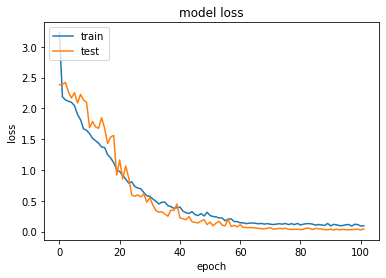

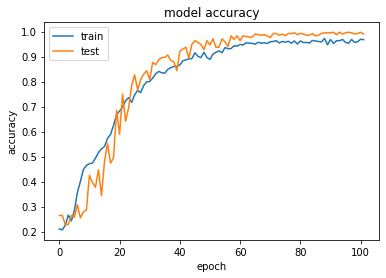

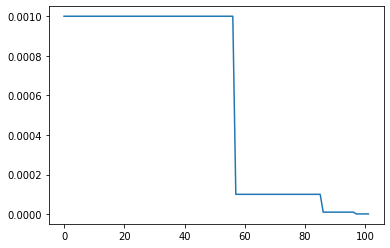

In [7]:
model = Sequential()
model.add(Input(shape=input_shape + (3,)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(train_data.num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


do_fit(model, train_data, validation_data, 'model2')

Epoch 1/20000
31/31 [==============================] - ETA: 0s - loss: 506.7471 - accuracy: 0.1522
Epoch 1: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 89ms/step - loss: 506.7471 - accuracy: 0.1522 - val_loss: 342.6487 - val_accuracy: 0.1322 - lr: 0.0010
Epoch 2/20000
31/31 [==============================] - ETA: 0s - loss: 263.3781 - accuracy: 0.1552
Epoch 2: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 83ms/step - loss: 263.3781 - accuracy: 0.1552 - val_loss: 224.2139 - val_accuracy: 0.0505 - lr: 0.0010
Epoch 3/20000
30/31 [============================>.] - ETA: 0s - loss: 231.8248 - accuracy: 0.1708
Epoch 3: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 84ms/step - loss: 228.2031 - accuracy: 0.1683 - val_loss: 164.3497 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 4/20000
31/31 [==============================] - ETA: 0s - loss: 187.8441 - accuracy: 0.1643
Epoch 4: accuracy did 

Epoch 29/20000
31/31 [==============================] - ETA: 0s - loss: 6.4304 - accuracy: 0.2248
Epoch 29: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 85ms/step - loss: 6.4304 - accuracy: 0.2248 - val_loss: 4.0345 - val_accuracy: 0.1851 - lr: 1.0000e-04
Epoch 30/20000
31/31 [==============================] - ETA: 0s - loss: 4.9795 - accuracy: 0.2470
Epoch 30: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 83ms/step - loss: 4.9795 - accuracy: 0.2470 - val_loss: 3.7637 - val_accuracy: 0.0913 - lr: 1.0000e-04
Epoch 31/20000
31/31 [==============================] - ETA: 0s - loss: 4.3746 - accuracy: 0.2470
Epoch 31: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 84ms/step - loss: 4.3746 - accuracy: 0.2470 - val_loss: 3.4281 - val_accuracy: 0.1659 - lr: 1.0000e-04
Epoch 32/20000
31/31 [==============================] - ETA: 0s - loss: 4.1413 - accuracy: 0.2218
Epoch 32: accuracy did 

Epoch 57/20000
31/31 [==============================] - ETA: 0s - loss: 2.0870 - accuracy: 0.3165
Epoch 57: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 83ms/step - loss: 2.0870 - accuracy: 0.3165 - val_loss: 2.1055 - val_accuracy: 0.2812 - lr: 1.0000e-04
Epoch 58/20000
31/31 [==============================] - ETA: 0s - loss: 2.1069 - accuracy: 0.2913
Epoch 58: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 58: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 85ms/step - loss: 2.1069 - accuracy: 0.2913 - val_loss: 2.2498 - val_accuracy: 0.1779 - lr: 1.0000e-04
Epoch 59/20000
31/31 [==============================] - ETA: 0s - loss: 2.0654 - accuracy: 0.2923
Epoch 59: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 82ms/step - loss: 2.0654 - accuracy: 0.2923 - val_loss: 2.0291 - val_accuracy: 0.2788 - lr: 1.0000e-05
Epoch 60/20000
31/31 [====================

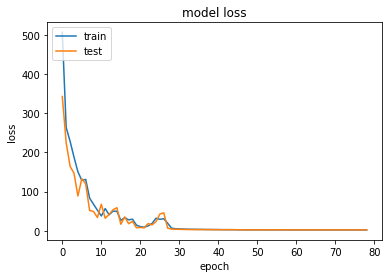

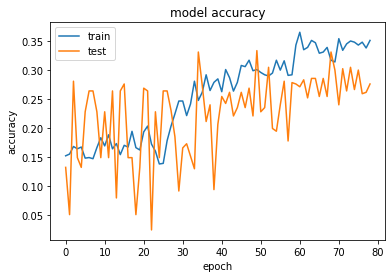

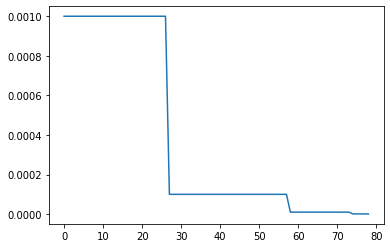

In [8]:
model = Sequential()
model.add(Input(shape=input_shape + (3,)))
model.add(Flatten())
model.add(Dense(1024))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(train_data.num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


do_fit(model, train_data, validation_data, 'model3')

Epoch 1/20000
30/31 [============================>.] - ETA: 0s - loss: 2.4048 - accuracy: 0.2031
Epoch 1: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 89ms/step - loss: 2.4066 - accuracy: 0.2046 - val_loss: 2.1598 - val_accuracy: 0.2644 - lr: 0.0010
Epoch 2/20000
31/31 [==============================] - ETA: 0s - loss: 2.2231 - accuracy: 0.2540
Epoch 2: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 83ms/step - loss: 2.2231 - accuracy: 0.2540 - val_loss: 2.0668 - val_accuracy: 0.2644 - lr: 0.0010
Epoch 3/20000
31/31 [==============================] - ETA: 0s - loss: 2.1760 - accuracy: 0.2228
Epoch 3: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 86ms/step - loss: 2.1760 - accuracy: 0.2228 - val_loss: 2.0566 - val_accuracy: 0.2644 - lr: 0.0010
Epoch 4/20000
31/31 [==============================] - ETA: 0s - loss: 2.1406 - accuracy: 0.2288
Epoch 4: accuracy did not improve from 0.8

Epoch 29/20000
31/31 [==============================] - ETA: 0s - loss: 0.3087 - accuracy: 0.8911
Epoch 29: accuracy did not improve from 0.89819
31/31 [==============================] - 3s 84ms/step - loss: 0.3087 - accuracy: 0.8911 - val_loss: 0.1596 - val_accuracy: 0.9423 - lr: 0.0010
Epoch 30/20000
31/31 [==============================] - ETA: 0s - loss: 0.2641 - accuracy: 0.9012
Epoch 30: accuracy improved from 0.89819 to 0.90121, saving model to ./model4\epoch_030-0.95433.hdf5
31/31 [==============================] - 3s 87ms/step - loss: 0.2641 - accuracy: 0.9012 - val_loss: 0.1242 - val_accuracy: 0.9543 - lr: 0.0010
Epoch 31/20000
31/31 [==============================] - ETA: 0s - loss: 0.2502 - accuracy: 0.9083
Epoch 31: accuracy improved from 0.90121 to 0.90827, saving model to ./model4\epoch_031-0.96635.hdf5
31/31 [==============================] - 3s 85ms/step - loss: 0.2502 - accuracy: 0.9083 - val_loss: 0.1184 - val_accuracy: 0.9663 - lr: 0.0010
Epoch 32/20000
31/31 [=====

Epoch 55/20000
30/31 [============================>.] - ETA: 0s - loss: 0.0948 - accuracy: 0.9625
Epoch 55: accuracy did not improve from 0.97278
31/31 [==============================] - 3s 84ms/step - loss: 0.0944 - accuracy: 0.9627 - val_loss: 0.0289 - val_accuracy: 0.9928 - lr: 1.0000e-04
Epoch 56/20000
30/31 [============================>.] - ETA: 0s - loss: 0.1048 - accuracy: 0.9646
Epoch 56: accuracy did not improve from 0.97278
31/31 [==============================] - 3s 85ms/step - loss: 0.1069 - accuracy: 0.9647 - val_loss: 0.0286 - val_accuracy: 0.9928 - lr: 1.0000e-04
Epoch 57/20000
31/31 [==============================] - ETA: 0s - loss: 0.0818 - accuracy: 0.9778
Epoch 57: accuracy improved from 0.97278 to 0.97782, saving model to ./model4\epoch_057-0.99038.hdf5
31/31 [==============================] - 3s 87ms/step - loss: 0.0818 - accuracy: 0.9778 - val_loss: 0.0268 - val_accuracy: 0.9904 - lr: 1.0000e-04
Epoch 58/20000
31/31 [==============================] - ETA: 0s - lo

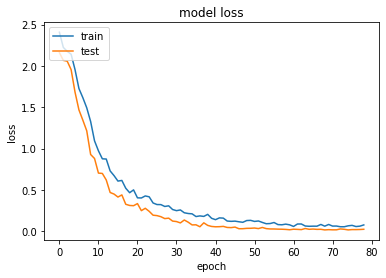

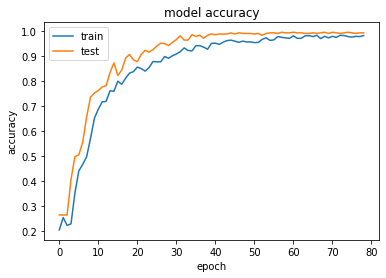

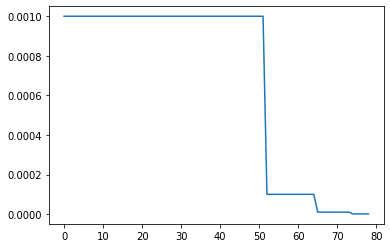

In [9]:
model = Sequential()
model.add(Input(shape=input_shape + (3,)))

model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(train_data.num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


do_fit(model, train_data, validation_data, 'model4')

Epoch 1/20000
31/31 [==============================] - ETA: 0s - loss: 2.3854 - accuracy: 0.2127
Epoch 1: accuracy did not improve from 0.85000
31/31 [==============================] - 4s 93ms/step - loss: 2.3854 - accuracy: 0.2127 - val_loss: 2.1138 - val_accuracy: 0.2644 - lr: 0.0010
Epoch 2/20000
31/31 [==============================] - ETA: 0s - loss: 2.2070 - accuracy: 0.2450
Epoch 2: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 87ms/step - loss: 2.2070 - accuracy: 0.2450 - val_loss: 2.0380 - val_accuracy: 0.3798 - lr: 0.0010
Epoch 3/20000
31/31 [==============================] - ETA: 0s - loss: 2.0412 - accuracy: 0.3488
Epoch 3: accuracy did not improve from 0.85000
31/31 [==============================] - 3s 87ms/step - loss: 2.0412 - accuracy: 0.3488 - val_loss: 1.8143 - val_accuracy: 0.5120 - lr: 0.0010
Epoch 4/20000
30/31 [============================>.] - ETA: 0s - loss: 1.7751 - accuracy: 0.4615
Epoch 4: accuracy did not improve from 0.8

31/31 [==============================] - ETA: 0s - loss: 0.3130 - accuracy: 0.8982
Epoch 29: accuracy improved from 0.88407 to 0.89819, saving model to ./model5\epoch_029-0.95673.hdf5
31/31 [==============================] - 3s 93ms/step - loss: 0.3130 - accuracy: 0.8982 - val_loss: 0.1618 - val_accuracy: 0.9567 - lr: 0.0010
Epoch 30/20000
31/31 [==============================] - ETA: 0s - loss: 0.3744 - accuracy: 0.8760
Epoch 30: accuracy did not improve from 0.89819
31/31 [==============================] - 3s 85ms/step - loss: 0.3744 - accuracy: 0.8760 - val_loss: 0.1546 - val_accuracy: 0.9519 - lr: 0.0010
Epoch 31/20000
31/31 [==============================] - ETA: 0s - loss: 0.2724 - accuracy: 0.9062
Epoch 31: accuracy improved from 0.89819 to 0.90625, saving model to ./model5\epoch_031-0.94952.hdf5
31/31 [==============================] - 3s 92ms/step - loss: 0.2724 - accuracy: 0.9062 - val_loss: 0.1424 - val_accuracy: 0.9495 - lr: 0.0010
Epoch 32/20000
31/31 [====================

Epoch 56/20000
31/31 [==============================] - ETA: 0s - loss: 0.2230 - accuracy: 0.9254
Epoch 56: accuracy did not improve from 0.94657
31/31 [==============================] - 3s 87ms/step - loss: 0.2230 - accuracy: 0.9254 - val_loss: 0.0771 - val_accuracy: 0.9736 - lr: 0.0010
Epoch 57/20000
31/31 [==============================] - ETA: 0s - loss: 0.1748 - accuracy: 0.9456
Epoch 57: accuracy did not improve from 0.94657
31/31 [==============================] - 3s 87ms/step - loss: 0.1748 - accuracy: 0.9456 - val_loss: 0.0848 - val_accuracy: 0.9784 - lr: 0.0010
Epoch 58/20000
31/31 [==============================] - ETA: 0s - loss: 0.1860 - accuracy: 0.9365
Epoch 58: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 58: accuracy did not improve from 0.94657
31/31 [==============================] - 3s 86ms/step - loss: 0.1860 - accuracy: 0.9365 - val_loss: 0.0646 - val_accuracy: 0.9856 - lr: 0.0010
Epoch 59/20000
31/31 [==============================] 

Epoch 83/20000
31/31 [==============================] - ETA: 0s - loss: 0.1232 - accuracy: 0.9607
Epoch 83: accuracy did not improve from 0.96169
31/31 [==============================] - 3s 88ms/step - loss: 0.1232 - accuracy: 0.9607 - val_loss: 0.0293 - val_accuracy: 0.9976 - lr: 1.0000e-05
Epoch 84/20000
30/31 [============================>.] - ETA: 0s - loss: 0.1391 - accuracy: 0.9573
Epoch 84: accuracy did not improve from 0.96169
31/31 [==============================] - 3s 86ms/step - loss: 0.1410 - accuracy: 0.9567 - val_loss: 0.0354 - val_accuracy: 0.9904 - lr: 1.0000e-05
Epoch 85/20000
31/31 [==============================] - ETA: 0s - loss: 0.1345 - accuracy: 0.9536
Epoch 85: accuracy did not improve from 0.96169
31/31 [==============================] - 3s 86ms/step - loss: 0.1345 - accuracy: 0.9536 - val_loss: 0.0400 - val_accuracy: 0.9928 - lr: 1.0000e-05
Epoch 86/20000
31/31 [==============================] - ETA: 0s - loss: 0.1676 - accuracy: 0.9425
Epoch 86: accuracy did 

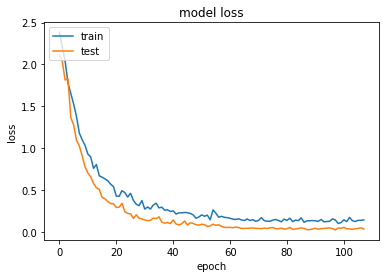

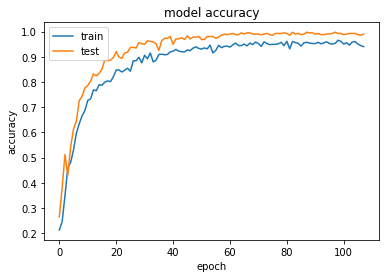

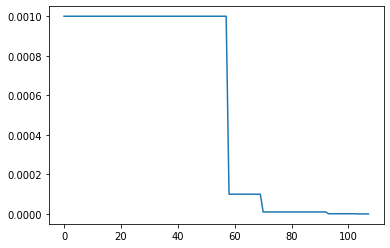

In [10]:
model = Sequential()
model.add(Input(shape=input_shape + (3,)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(train_data.num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


do_fit(model, train_data, validation_data, 'model5')

Epoch 1/100
31/31 [==============================] - ETA: 0s - loss: 1.2905 - accuracy: 0.7359
Epoch 1: accuracy did not improve from 0.85000
31/31 [==============================] - 6s 124ms/step - loss: 1.2905 - accuracy: 0.7359 - val_loss: 0.9578 - val_accuracy: 0.7620 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - ETA: 0s - loss: 0.4827 - accuracy: 0.8599
Epoch 2: accuracy improved from 0.85000 to 0.85988, saving model to ./model_inceptionV3_step1\epoch_002-0.89663.hdf5
31/31 [==============================] - 3s 106ms/step - loss: 0.4827 - accuracy: 0.8599 - val_loss: 0.3564 - val_accuracy: 0.8966 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - ETA: 0s - loss: 0.3066 - accuracy: 0.9052
Epoch 3: accuracy improved from 0.85988 to 0.90524, saving model to ./model_inceptionV3_step1\epoch_003-0.89904.hdf5
31/31 [==============================] - 3s 106ms/step - loss: 0.3066 - accuracy: 0.9052 - val_loss: 0.4702 - val_accuracy: 0.8990 - lr: 0.0010
Ep

Epoch 27/100
31/31 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9929
Epoch 27: accuracy improved from 0.98690 to 0.99294, saving model to ./model_inceptionV3_step1\epoch_027-0.99279.hdf5

Got to accuracy '99.29%'
31/31 [==============================] - 3s 102ms/step - loss: 0.0263 - accuracy: 0.9929 - val_loss: 0.0171 - val_accuracy: 0.9928 - lr: 1.0000e-04


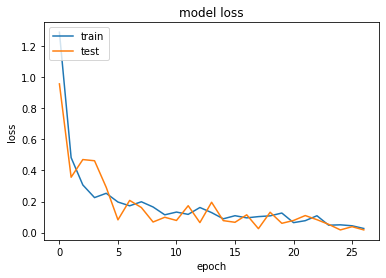

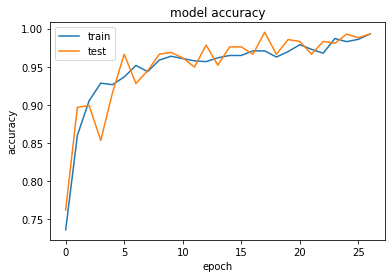

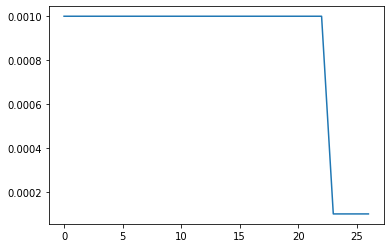

In [13]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

input_tensor = Input(shape=input_shape+(3,))

base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=input_tensor)
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


do_fit(model, train_data, validation_data, 'model_inceptionV3_step1', epochs=100)

Epoch 1/100


e:\nonogram_player\.venv\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


31/31 [==============================] - ETA: 0s - loss: 1.9731 - accuracy: 0.7268
Epoch 1: accuracy did not improve from 0.85000
31/31 [==============================] - 7s 120ms/step - loss: 1.9731 - accuracy: 0.7268 - val_loss: 0.4577 - val_accuracy: 0.9495 - lr: 1.0000e-04
Epoch 2/100
30/31 [============================>.] - ETA: 0s - loss: 0.4683 - accuracy: 0.8823
Epoch 2: accuracy improved from 0.85000 to 0.88206, saving model to ./model_inceptionV3_step2\epoch_002-0.95673.hdf5
31/31 [==============================] - 3s 103ms/step - loss: 0.4690 - accuracy: 0.8821 - val_loss: 0.4740 - val_accuracy: 0.9567 - lr: 1.0000e-04
Epoch 3/100
31/31 [==============================] - ETA: 0s - loss: 0.3440 - accuracy: 0.9224
Epoch 3: accuracy improved from 0.88206 to 0.92238, saving model to ./model_inceptionV3_step2\epoch_003-0.97837.hdf5
31/31 [==============================] - 3s 104ms/step - loss: 0.3440 - accuracy: 0.9224 - val_loss: 0.1375 - val_accuracy: 0.9784 - lr: 1.0000e-04
Ep

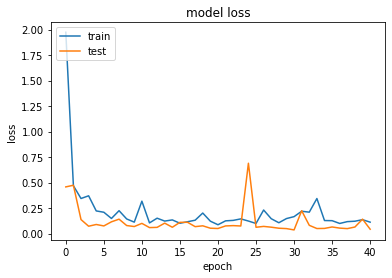

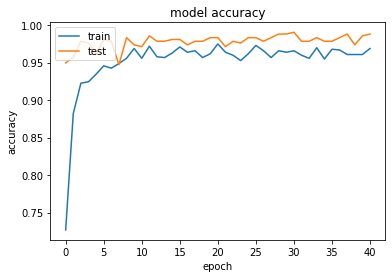

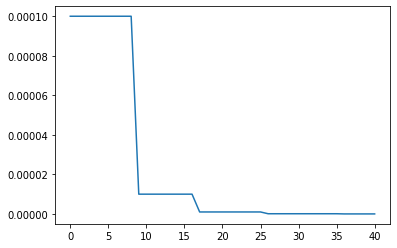

In [14]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


do_fit(model, train_data, validation_data, 'model_inceptionV3_step2', epochs=100)

Epoch 1/20000
31/31 [==============================] - ETA: 0s - loss: 0.2442 - accuracy: 0.9365
Epoch 1: accuracy improved from 0.85000 to 0.93649, saving model to ./model_inceptionV3_step3\epoch_001-0.98558.hdf5
31/31 [==============================] - 7s 134ms/step - loss: 0.2442 - accuracy: 0.9365 - val_loss: 0.0663 - val_accuracy: 0.9856 - lr: 1.0000e-05
Epoch 2/20000
31/31 [==============================] - ETA: 0s - loss: 0.1774 - accuracy: 0.9516
Epoch 2: accuracy improved from 0.93649 to 0.95161, saving model to ./model_inceptionV3_step3\epoch_002-0.98798.hdf5
31/31 [==============================] - 3s 105ms/step - loss: 0.1774 - accuracy: 0.9516 - val_loss: 0.0435 - val_accuracy: 0.9880 - lr: 1.0000e-05
Epoch 3/20000
31/31 [==============================] - ETA: 0s - loss: 0.2426 - accuracy: 0.9425
Epoch 3: accuracy did not improve from 0.95161
31/31 [==============================] - 3s 87ms/step - loss: 0.2426 - accuracy: 0.9425 - val_loss: 0.0752 - val_accuracy: 0.9784 - 

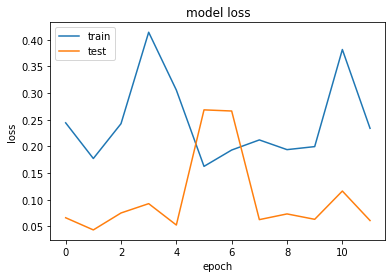

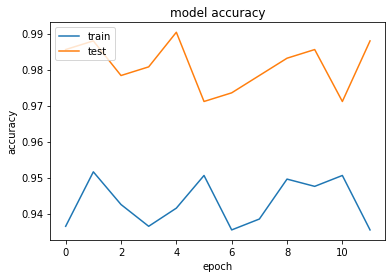

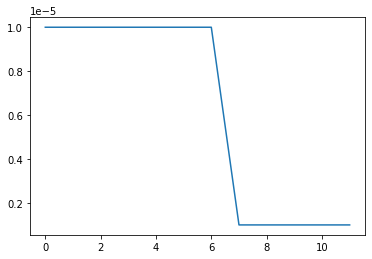

In [15]:
split_for_train = 230
for layer in model.layers[:split_for_train]:
   layer.trainable = False
for layer in model.layers[split_for_train:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.00001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


do_fit(model, train_data, validation_data, 'model_inceptionV3_step3')


Epoch 1/100
31/31 [==============================] - ETA: 0s - loss: 2.2349 - accuracy: 0.2591
Epoch 1: accuracy did not improve from 0.85000
31/31 [==============================] - 24s 293ms/step - loss: 2.2349 - accuracy: 0.2591 - val_loss: 1.9772 - val_accuracy: 0.3774 - lr: 0.0010
Epoch 2/100
31/31 [==============================] - ETA: 0s - loss: 2.0354 - accuracy: 0.3175
Epoch 2: accuracy did not improve from 0.85000
31/31 [==============================] - 5s 165ms/step - loss: 2.0354 - accuracy: 0.3175 - val_loss: 2.0718 - val_accuracy: 0.1803 - lr: 0.0010
Epoch 3/100
31/31 [==============================] - ETA: 0s - loss: 2.0085 - accuracy: 0.3387
Epoch 3: accuracy did not improve from 0.85000
31/31 [==============================] - 5s 163ms/step - loss: 2.0085 - accuracy: 0.3387 - val_loss: 1.9787 - val_accuracy: 0.2933 - lr: 0.0010
Epoch 4/100
31/31 [==============================] - ETA: 0s - loss: 1.9412 - accuracy: 0.3417
Epoch 4: accuracy did not improve from 0.85000

Epoch 29/100
31/31 [==============================] - ETA: 0s - loss: 1.4547 - accuracy: 0.5121
Epoch 29: accuracy did not improve from 0.85000
31/31 [==============================] - 5s 165ms/step - loss: 1.4547 - accuracy: 0.5121 - val_loss: 1.5824 - val_accuracy: 0.4207 - lr: 1.0000e-05
Epoch 30/100
31/31 [==============================] - ETA: 0s - loss: 1.4310 - accuracy: 0.5171
Epoch 30: accuracy did not improve from 0.85000
31/31 [==============================] - 5s 170ms/step - loss: 1.4310 - accuracy: 0.5171 - val_loss: 1.5392 - val_accuracy: 0.4567 - lr: 1.0000e-05
Epoch 31/100
31/31 [==============================] - ETA: 0s - loss: 1.4355 - accuracy: 0.5151
Epoch 31: accuracy did not improve from 0.85000
31/31 [==============================] - 5s 167ms/step - loss: 1.4355 - accuracy: 0.5151 - val_loss: 1.5571 - val_accuracy: 0.4519 - lr: 1.0000e-05
Epoch 31: early stopping


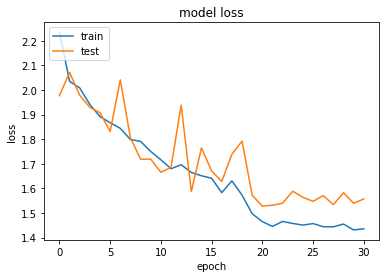

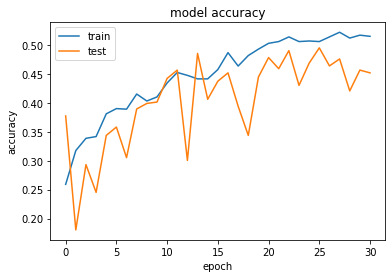

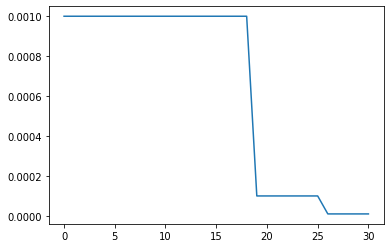

In [16]:
from keras.applications.efficientnet_v2 import EfficientNetV2L
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

input_tensor = Input(shape=input_shape+(3,))

base_model = EfficientNetV2L(weights='imagenet', include_top=False, input_tensor=input_tensor)
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


do_fit(model, train_data, validation_data, 'model_EfficientNetV2L_step1', epochs=100)

Epoch 1/100
31/31 [==============================] - ETA: 0s - loss: 1.5648 - accuracy: 0.5212
Epoch 1: accuracy did not improve from 0.85000
31/31 [==============================] - 27s 347ms/step - loss: 1.5648 - accuracy: 0.5212 - val_loss: 1.7112 - val_accuracy: 0.4279 - lr: 1.0000e-04
Epoch 2/100
31/31 [==============================] - ETA: 0s - loss: 1.2515 - accuracy: 0.5796
Epoch 2: accuracy did not improve from 0.85000
31/31 [==============================] - 7s 213ms/step - loss: 1.2515 - accuracy: 0.5796 - val_loss: 1.0750 - val_accuracy: 0.6346 - lr: 1.0000e-04
Epoch 3/100
31/31 [==============================] - ETA: 0s - loss: 1.1178 - accuracy: 0.6179
Epoch 3: accuracy did not improve from 0.85000
31/31 [==============================] - 7s 215ms/step - loss: 1.1178 - accuracy: 0.6179 - val_loss: 1.0646 - val_accuracy: 0.6346 - lr: 1.0000e-04
Epoch 4/100
31/31 [==============================] - ETA: 0s - loss: 1.0278 - accuracy: 0.6361
Epoch 4: accuracy did not improve 

31/31 [==============================] - 9s 303ms/step - loss: 0.3681 - accuracy: 0.9052 - val_loss: 0.2964 - val_accuracy: 0.9087 - lr: 1.0000e-04
Epoch 28/100
31/31 [==============================] - ETA: 0s - loss: 0.3468 - accuracy: 0.9073
Epoch 28: accuracy improved from 0.90524 to 0.90726, saving model to ./model_EfficientNetV2L_step2\epoch_028-0.89904.hdf5
31/31 [==============================] - 8s 269ms/step - loss: 0.3468 - accuracy: 0.9073 - val_loss: 0.3251 - val_accuracy: 0.8990 - lr: 1.0000e-04
Epoch 29/100
31/31 [==============================] - ETA: 0s - loss: 0.3369 - accuracy: 0.9073
Epoch 29: accuracy did not improve from 0.90726
31/31 [==============================] - 7s 231ms/step - loss: 0.3369 - accuracy: 0.9073 - val_loss: 0.3675 - val_accuracy: 0.8870 - lr: 1.0000e-04
Epoch 30/100
31/31 [==============================] - ETA: 0s - loss: 0.3283 - accuracy: 0.9113
Epoch 30: accuracy improved from 0.90726 to 0.91129, saving model to ./model_EfficientNetV2L_step2

Epoch 53/100
31/31 [==============================] - ETA: 0s - loss: 0.1868 - accuracy: 0.9456
Epoch 53: accuracy did not improve from 0.95565
31/31 [==============================] - 7s 225ms/step - loss: 0.1868 - accuracy: 0.9456 - val_loss: 0.1238 - val_accuracy: 0.9688 - lr: 1.0000e-05
Epoch 54/100
31/31 [==============================] - ETA: 0s - loss: 0.1614 - accuracy: 0.9587
Epoch 54: accuracy improved from 0.95565 to 0.95867, saving model to ./model_EfficientNetV2L_step2\epoch_054-0.97115.hdf5
31/31 [==============================] - 8s 274ms/step - loss: 0.1614 - accuracy: 0.9587 - val_loss: 0.1049 - val_accuracy: 0.9712 - lr: 1.0000e-05
Epoch 55/100
31/31 [==============================] - ETA: 0s - loss: 0.1459 - accuracy: 0.9607
Epoch 55: accuracy improved from 0.95867 to 0.96069, saving model to ./model_EfficientNetV2L_step2\epoch_055-0.97837.hdf5
31/31 [==============================] - 8s 274ms/step - loss: 0.1459 - accuracy: 0.9607 - val_loss: 0.0994 - val_accuracy: 

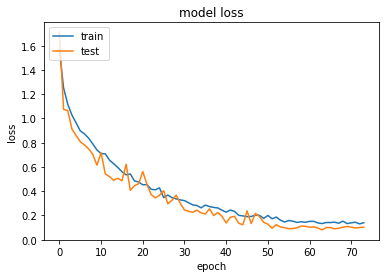

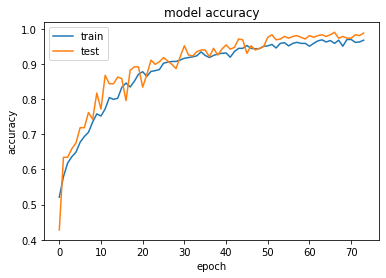

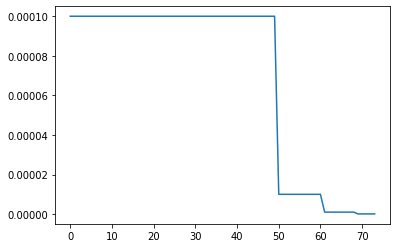

In [17]:
split_for_train = (len(base_model.layers) // 7) * 6  # 1/7th trainable.
for layer in model.layers[:split_for_train]:
   layer.trainable = False
for layer in model.layers[split_for_train:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

do_fit(model, train_data, validation_data, 'model_EfficientNetV2L_step2', epochs=100)

Epoch 1/20000
31/31 [==============================] - ETA: 0s - loss: 0.1717 - accuracy: 0.9627
Epoch 1: accuracy improved from 0.85000 to 0.96270, saving model to ./model_EfficientNetV2L_step3\epoch_001-0.95913.hdf5
31/31 [==============================] - 49s 1s/step - loss: 0.1717 - accuracy: 0.9627 - val_loss: 0.1491 - val_accuracy: 0.9591 - lr: 1.0000e-05
Epoch 2/20000
31/31 [==============================] - ETA: 0s - loss: 0.1747 - accuracy: 0.9496
Epoch 2: accuracy did not improve from 0.96270
31/31 [==============================] - 8s 244ms/step - loss: 0.1747 - accuracy: 0.9496 - val_loss: 0.1519 - val_accuracy: 0.9688 - lr: 1.0000e-05
Epoch 3/20000
31/31 [==============================] - ETA: 0s - loss: 0.2033 - accuracy: 0.9415
Epoch 3: accuracy did not improve from 0.96270
31/31 [==============================] - 8s 244ms/step - loss: 0.2033 - accuracy: 0.9415 - val_loss: 0.1409 - val_accuracy: 0.9639 - lr: 1.0000e-05
Epoch 4/20000
31/31 [==============================]

31/31 [==============================] - 8s 250ms/step - loss: 0.1504 - accuracy: 0.9647 - val_loss: 0.1213 - val_accuracy: 0.9760 - lr: 1.0000e-07
Epoch 28/20000
31/31 [==============================] - ETA: 0s - loss: 0.1613 - accuracy: 0.9617
Epoch 28: accuracy did not improve from 0.96774
31/31 [==============================] - 8s 251ms/step - loss: 0.1613 - accuracy: 0.9617 - val_loss: 0.1077 - val_accuracy: 0.9832 - lr: 1.0000e-07
Epoch 29/20000
31/31 [==============================] - ETA: 0s - loss: 0.1578 - accuracy: 0.9637
Epoch 29: accuracy did not improve from 0.96774
31/31 [==============================] - 8s 260ms/step - loss: 0.1578 - accuracy: 0.9637 - val_loss: 0.1027 - val_accuracy: 0.9784 - lr: 1.0000e-07
Epoch 30/20000
31/31 [==============================] - ETA: 0s - loss: 0.1465 - accuracy: 0.9718
Epoch 30: accuracy improved from 0.96774 to 0.97177, saving model to ./model_EfficientNetV2L_step3\epoch_030-0.98077.hdf5
31/31 [==============================] - 10s

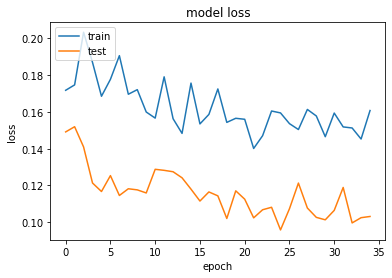

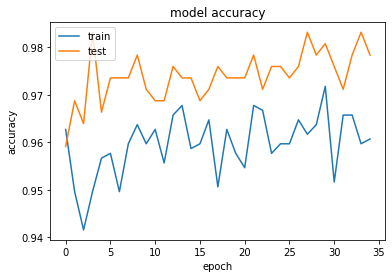

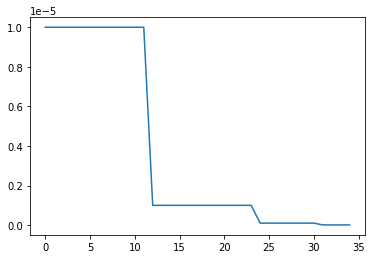

In [19]:
split_for_train = (len(base_model.layers) // 7) * 5  # 2/7th trainable.
for layer in model.layers[:split_for_train]:
   layer.trainable = False
for layer in model.layers[split_for_train:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.00001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

do_fit(model, train_data, validation_data, 'model_EfficientNetV2L_step3')